# Corrélation Client-Age-CA
## Quanti/Quanti

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import datetime



from datetime import datetime

In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(df.info())
    display(df.head())
    display(df.describe().T)
    display(df.nunique())

In [3]:
# Déclaration d'une fonction de prédiction
def predict(x):
   return slope * x + intercept

In [4]:
# Importation du dataFrame 'df_enrichi'
df_enrichi = pd.read_csv("df_enrichi.csv", index_col="date_2", parse_dates= True)

# Vérifier que la première colonne est une idex
df_enrichi.index = pd.to_datetime(df_enrichi.index)

# Trier sur la colonne date
df_enrichi = df_enrichi.sort_index()

# Visualisualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  679111 non-null  int64  
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  float64
 4   age         679111 non-null  float64
 5   id_prod     679111 non-null  object 
 6   date        679111 non-null  object 
 7   session_id  679111 non-null  object 
 8   price       679111 non-null  float64
 9   categ       679111 non-null  float64
 10  _merge      679111 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.2+ MB


None

,Unnamed: 0,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
date_2,,,,,,,,,,,
2021-03-01 00:01:07.843138,129502,c_329,f,1967.0,55.0,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0.0,both
2021-03-01 00:02:26.047414,17306,c_664,m,1960.0,62.0,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0.0,both
2021-03-01 00:02:38.311413,146527,c_580,m,1988.0,34.0,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0.0,both
2021-03-01 00:04:54.559692,506717,c_7912,f,1989.0,33.0,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0.0,both
2021-03-01 00:05:18.801198,218220,c_2033,f,1956.0,66.0,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0.0,both


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,679111.0,339599.602812,196104.276737,0.00,169777.50,339555.00,509332.50,679331.0
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


Unnamed: 0    679111
client_id       8600
sex                2
birth             76
age               76
id_prod         3265
date          679111
session_id    342275
price           1442
categ              3
_merge             1
dtype: int64

In [5]:
# Eliminer les clients B2B
df_enrichi = df_enrichi[~df_enrichi["client_id"].isin(["c_1609", "c_4958", "c_6714", "c_3454"])]

In [6]:
# Préparation des données d'analyse

df_QT_QT_ClientAgeCA = df_enrichi[["client_id", "age", "price"]]\
                            .groupby(by=["client_id", "age"])\
                            .sum()\
                            .reset_index()\
                            .copy()
df_QT_QT_ClientAgeCA.rename(columns={"price":"CA_Client"}, inplace=True)
df_QT_QT_ClientAgeCA.head()

,client_id,age,CA_Client
0,c_1,67.0,558.18
1,c_10,66.0,1353.60
2,c_100,30.0,254.85
3,c_1000,56.0,2261.89
4,c_1001,40.0,1812.86


In [7]:
print("Affichage des individues qui ont 67 ans")
df_QT_QT_ClientAgeCA[df_QT_QT_ClientAgeCA["age"] == 67].sort_values(by=["CA_Client"], ascending=False).head(5)

Affichage des individues qui ont 67 ans


,client_id,age,CA_Client
1277,c_215,67.0,3141.17
7937,c_8161,67.0,2823.50
2619,c_336,67.0,2664.68
3954,c_4569,67.0,2275.80
4897,c_542,67.0,2268.21


# Analyse descriptive des données

In [8]:
# Visualisualisation de df_QT_QT_ClientAgeCA
analyseDataFrame(df_QT_QT_ClientAgeCA)

La dimension de DataFrame « df_QT_QT_ClientAgeCA » : (8596, 3) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  8596 non-null   object 
 1   age        8596 non-null   float64
 2   CA_Client  8596 non-null   float64
dtypes: float64(2), object(1)
memory usage: 201.6+ KB


None

,client_id,age,CA_Client
0,c_1,67.0,558.18
1,c_10,66.0,1353.60
2,c_100,30.0,254.85
3,c_1000,56.0,2261.89
4,c_1001,40.0,1812.86


,count,mean,std,min,25%,50%,75%,max
age,8596.0,43.739646,16.910542,18.00,30.00,43.000,56.0000,93.00
CA_Client,8596.0,1276.488848,954.182275,6.31,547.29,1026.845,1778.3175,5276.87


client_id    8596
age            76
CA_Client    8443
dtype: int64

# Visualisation de distribution de chaque variable

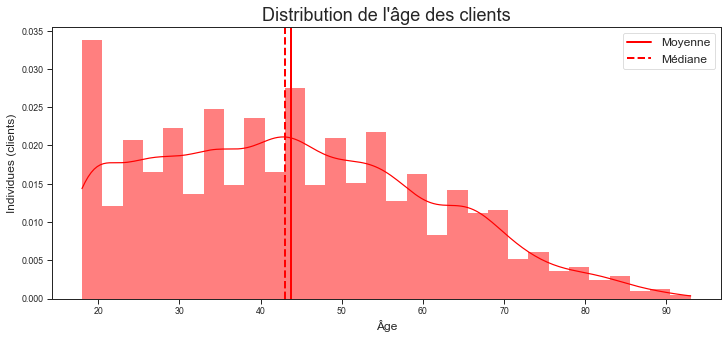

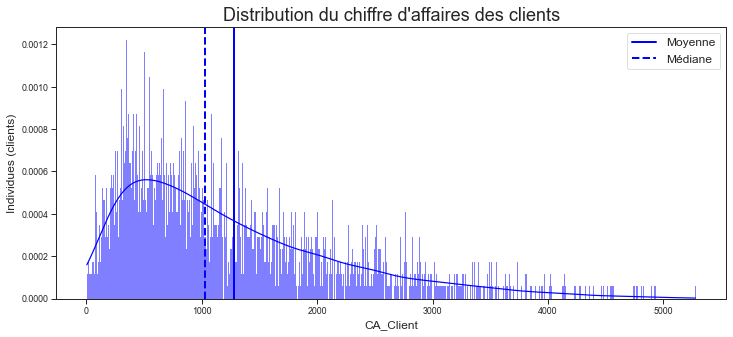

In [9]:
sns.set_style("ticks") # Parameters style dict, or one of {darkgrid, whitegrid, dark, white, ticks}

sns.set_context("paper") # Parameters context dict, or one of {paper, notebook, talk, poster}

plt.figure(figsize = (12,5))

_ = sns.histplot(df_QT_QT_ClientAgeCA["age"], color='red', kde=True, stat="density", linewidth=0)

_ = plt.axvline(x=df_QT_QT_ClientAgeCA["age"].mean(), label='Moyenne', linestyle='-', linewidth=2, color='red')
_ = plt.axvline(x=df_QT_QT_ClientAgeCA["age"].median(), label='Médiane', linestyle='--', linewidth=2, color='red')
_ = plt.title("Distribution de l'âge des clients", fontsize=18)
_ = plt.ylabel("Individues (clients)", fontsize=12)
_ = plt.xlabel("Âge", fontsize=12)
_ = plt.legend(prop={'size': 12})
_ = plt.show()

plt.figure(figsize = (12,5))
_ = sns.histplot(df_QT_QT_ClientAgeCA["CA_Client"], color='blue', binwidth=2,  kde=True, stat="density", linewidth=0)

_ = plt.axvline(x=df_QT_QT_ClientAgeCA["CA_Client"].mean(), label='Moyenne', linestyle='-', linewidth=2, color='blue')
_ = plt.axvline(x=df_QT_QT_ClientAgeCA["CA_Client"].median(), label='Médiane', linestyle='--', linewidth=2, color='blue')
_ = plt.title("Distribution du chiffre d'affaires des clients", fontsize=18)
_ = plt.ylabel("Individues (clients)", fontsize=12)
_ = plt.xlabel("CA_Client", fontsize=12)
_ = plt.legend(prop={'size': 12})
_ = plt.show()

# _ = plt.tight_layout()

_ = plt.show()

# Test de normalité

In [10]:
# Article pour interpretation de résultat 'stat' ou 'W'

# test de normalité shapiro-Wilk (loi normal)
# H0 : l'échantillon suit une loi normal / l'echantillon a une distribution Gaussienne
# H1 : hypothèse alternative

print("Premier test shapiro-Wilk -----------------------------------------------------------")
df_name = 'Âges'

stat, p_value = st.shapiro(df_QT_QT_ClientAgeCA["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon '{df_name}' semble avoir une distribution Gaussienne (ne pas rejeter H0")
else:
    print(f"L'échantillon '{df_name}' ne semble pas avoir une distribution Gaussienne (rejeter H0")
print()
# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Deuxième test shapiro-Wilk -----------------------------------------------------------")
df_name = 'CA_Client'

stat, p_value = st.shapiro(df_QT_QT_ClientAgeCA["CA_Client"])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon '{df_name}' semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon '{df_name}' ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()
# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

Premier test shapiro-Wilk -----------------------------------------------------------
Statistics=0.970, p=0.000
L'échantillon 'Âges' ne semble pas avoir une distribution Gaussienne (rejeter H0

Deuxième test shapiro-Wilk -----------------------------------------------------------
Statistics=0.904, p=0.000
L'échantillon 'CA_Client' ne semble pas avoir une distribution Gaussienne (rejeter H0)



/Users/jenny/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
# test de normalité Smirnov-Kolmogorov (loi normal)
# H0 : l'échantillon suit une loi normal / l'echantillon a une distribution Gaussienne
# H1 : hypothèse alternative

print("Premier test Smirnov-Kolmogorov -----------------------------------------------------------")
df_name = 'Âge'

stat, p_value = st.kstest(df_QT_QT_ClientAgeCA["age"], "norm")
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon '{df_name}' semble avoir une distribution Gaussienne (ne pas rejeter H0")
else:
    print(f"L'échantillon '{df_name}' ne semble pas avoir une distribution Gaussienne (rejeter H0")
print()
# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Deuxième test Smirnov-Kolmogorov -----------------------------------------------------------")
df_name = 'CA_Client'

stat, p_value = st.kstest(df_QT_QT_ClientAgeCA["CA_Client"], "norm")
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon '{df_name}' semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon '{df_name}' ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()
# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

Premier test Smirnov-Kolmogorov -----------------------------------------------------------
Statistics=1.000, p=0.000
L'échantillon 'Âge' ne semble pas avoir une distribution Gaussienne (rejeter H0

Deuxième test Smirnov-Kolmogorov -----------------------------------------------------------
Statistics=1.000, p=0.000
L'échantillon 'CA_Client' ne semble pas avoir une distribution Gaussienne (rejeter H0)



# Test de corrélations

### Pearson’s Correlation Coefficient

In [12]:
x = df_QT_QT_ClientAgeCA["age"]
y = df_QT_QT_ClientAgeCA["CA_Client"]

x_name = "Âge"
y_name = "Chiffre d'affaires clients"

alpha = 0.05

r_pearson, p_value = st.pearsonr(x, y)

# r de Pearson
print('r de Pearson          :', r_pearson)


# indice de covariation
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

# Coefficient de détermination / R2 / r-squared
print('r-squared             : ', r_pearson**2, " (le coefficient de détermination)")

print('p-value               : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

r de Pearson          : -0.18837617927219408
indice de covariation : -3039.235249825635
r-squared             :  0.035485584917189804  (le coefficient de détermination)
p-value               :  1.7101053363397493e-69

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Chiffre d'affaires clients »



### Spearman’s Rank Correlation

In [13]:
x = df_QT_QT_ClientAgeCA["age"]
y = df_QT_QT_ClientAgeCA["CA_Client"]

x_name = "Âge"
y_name = "Chiffre d'affaires"

alpha = 0.05

stat, p_value = st.spearmanr(x, y)

print('Spearmanr stat : ', stat)

print('p-value        : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

Spearmanr stat :  -0.1851390805263805
p-value        :  3.7882642621417936e-67

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Chiffre d'affaires »



### Kendall’s Rank Correlation

In [14]:
x = df_QT_QT_ClientAgeCA["age"]
y = df_QT_QT_ClientAgeCA["CA_Client"]

x_name = "Âge"
y_name = "Chiffre d'affaires clients"

alpha = 0.05

stat, p_value = st.kendalltau(x, y)

print('Kendalltau stat : ', stat)

print('p-value         : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

Kendalltau stat :  -0.12413364556120854
p-value         :  1.4146174664063088e-65

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Chiffre d'affaires clients »



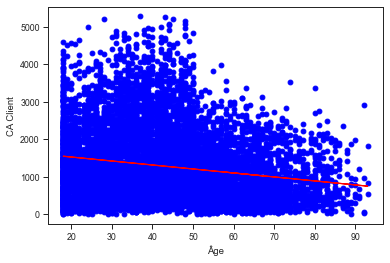

In [16]:
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = st.linregress(df_QT_QT_ClientAgeCA["age"],
                                                            df_QT_QT_ClientAgeCA["CA_Client"])

plt.plot(df_QT_QT_ClientAgeCA["age"],df_QT_QT_ClientAgeCA["CA_Client"],"bo")
plt.xlabel("Âge")
plt.ylabel("CA Client")
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
#fitLine = predict(df_QT_QT_ClientAgeCA['age'])
fitLine = slope * df_QT_QT_ClientAgeCA["age"] + intercept
plt.plot(df_QT_QT_ClientAgeCA["age"], fitLine, c="r")